In [2]:
"""
여러분은 HR 테크 스타트업의 데이터 분석가입니다.

회사는 고객의 이력서 데이터를 바탕으로, 앞으로 6개월 안에 이직할 가능성이 높은 인재를 선별하고자 합니다.

데이터는 Kaggle에서 제공한 "HR Analytics – Job Change of Data Scientists"를 사용합니다.

하지만 이 데이터는 결측치, 범주형 변수, 불균형 데이터 등 많은 문제를 안고 있습니다.

따라서 오늘 우리는 10단계 전처리 플랜을 통해 이 데이터를 완벽하게 분석 가능한 상태로 만들 것입니다.

"""
#1. 데이터 로딩 및 구조 파악 
import pandas as pd

df=pd.read_csv("aug_train.csv")

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


'\nHR Analytics: Job Change of Data Scientists 데이터셋의 각 컬럼에 대해 설명드리겠습니다.\u200b\nenrollee_id: 각 지원자에게 부여된 고유 식별자입니다.\u200b\ncity: 지원자가 거주하는 도시의 코드입니다.\u200b\ncity_development_index: 거주 도시의 개발 지수를 나타내는 척도로, 값이 높을수록 개발 수준이 높음을 의미합니다.\u200b\ngender: 지원자의 성별 정보입니다.\u200b\nrelevent_experience: 지원자가 해당 분야에서의 관련 경력을 보유하고 있는지 여부를 나타냅니다.\u200b\nenrolled_university: 지원자가 현재 등록한 대학 과정의 유형을 나타냅니다.\u200b\neducation_level: 지원자의 학력 수준을 나타냅니다.\u200b\nmajor_discipline: 지원자의 전공 분야를 나타냅니다.\u200b\nexperience: 지원자의 총 경력 연수를 나타냅니다.\u200b\ncompany_size: 현재 근무 중인 회사의 직원 수를 나타냅니다.\u200b\ncompany_type: 현재 근무 중인 회사의 유형을 나타냅니다.\u200b\nlast_new_job: 이전 직장과 현재 직장 사이의 기간(년 단위)을 나타냅니다.\u200b\ntraining_hours: 완료한 교육 시간 수를 나타냅니다.\u200bMedium+1Medium+1\ntarget: 지원자가 새로운 일자리를 찾고 있는지 여부를 나타내는 이진 분류 값입니다.\n'

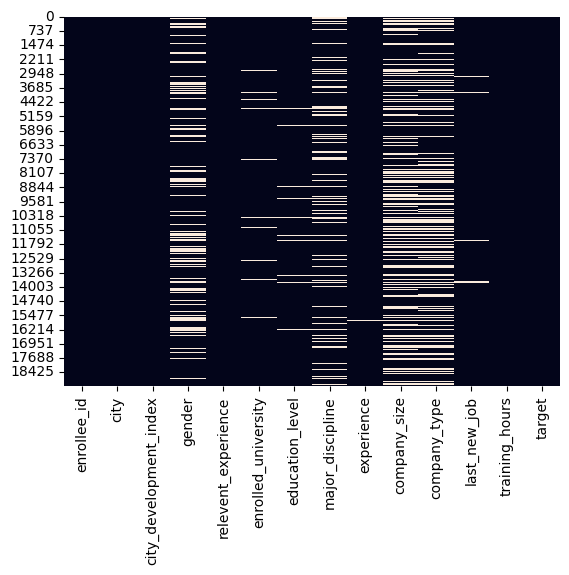

In [3]:
#총 14개의 컬럼, 19,158개의 행이 있습니다. 데이터 타입과 누락된 컬럼을 먼저 살펴봅시다."
#2단계: 결측치 시각화 및 처리 전략 설계
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False) #cbar=False는 이 색상 범례를 표시하지 않도록 설정하는 것입니다.

'''
HR Analytics: Job Change of Data Scientists 데이터셋의 각 컬럼에 대해 설명드리겠습니다.​
enrollee_id: 각 지원자에게 부여된 고유 식별자입니다.​
city: 지원자가 거주하는 도시의 코드입니다.​
city_development_index: 거주 도시의 개발 지수를 나타내는 척도로, 값이 높을수록 개발 수준이 높음을 의미합니다.​
gender: 지원자의 성별 정보입니다.​
relevent_experience: 지원자가 해당 분야에서의 관련 경력을 보유하고 있는지 여부를 나타냅니다.​
enrolled_university: 지원자가 현재 등록한 대학 과정의 유형을 나타냅니다.​
education_level: 지원자의 학력 수준을 나타냅니다.​
major_discipline: 지원자의 전공 분야를 나타냅니다.​
experience: 지원자의 총 경력 연수를 나타냅니다.​
company_size: 현재 근무 중인 회사의 직원 수를 나타냅니다.​
company_type: 현재 근무 중인 회사의 유형을 나타냅니다.​
last_new_job: 이전 직장과 현재 직장 사이의 기간(년 단위)을 나타냅니다.​
training_hours: 완료한 교육 시간 수를 나타냅니다.​Medium+1Medium+1
target: 지원자가 새로운 일자리를 찾고 있는지 여부를 나타내는 이진 분류 값입니다.
'''

In [4]:
'''
그림 해석:
-검정색(Black): 해당 셀(데이터)이 존재하는 값(결측치 X)
-흰색(White) 또는 밝은 선: 해당 셀에 결측치(null(데이터 빔), NaN(누락)) 가 있다는 의미 

-->gender, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new_job 등은 결측치가 꽤 많이 있습니다.
'''
# 결측치 비율 계산 및 필터링 (1% 이상)
missing_ratio=(df.isnull().sum()/len(df)*100).sort_values(ascending=False) #데이터 정렬
missing_ratio=missing_ratio[missing_ratio>=1].round(1) 
# 결측치 비율이 1% 이상인 컬럼만 추려내고, 소수점 한 자리로 반올림하는 작업을 수행합니다.

print(missing_ratio.astype(str) + "%")
"지금 보시는 흰 줄들이 결측치입니다."
" 이 중 일부는 전략적으로 'Unknown'으로 채우고"
"일부는 제거할 수도 있습니다."


company_type           32.0%
company_size           31.0%
gender                 23.5%
major_discipline       14.7%
education_level         2.4%
last_new_job            2.2%
enrolled_university     2.0%
dtype: object


'일부는 제거할 수도 있습니다.'

In [5]:
'''
전처리 시 활용 팁
-결측치 비율 높은 컬럼(company_size, company_type, major_discipline) 부터!
-전략: Unknown, 그룹 평균/최빈값으로 채우기, 또는 제거

전체 결측치 시각화의 장점
-어떤 컬럼을 먼저 처리할지 우선순위를 정할 수 있음
-전처리 전략 발표 시 시각자료로 매우 유용
'''
"여기서 중요한 건 단순히 '채우기'가 아니라,"
" 어떤 기준으로 채우는지가 더 중요합니다."
" 실무에서는 이 기준이 전략이 됩니다."
#3단계: 범주형 변수 인코딩
'''from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse_output=False)
encoded=encoder.fit_transform(df[['company_type']])
encoded_df=pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['company_type']))
'''

df['gender'].value_counts(dropna=False)
# value_counts()는 해당 컬럼에 존재하는 값들의 개수를 세는 함수입니다.
# dropna=False 옵션을 주면, 결측치(NaN) 도 함께 계산해줍니다.

from sklearn.preprocessing import LabelEncoder
import copy

le=LabelEncoder()
df["gender"]=le.fit_transform(df['gender'].astype(str))# NaN도 'nan' 처리됨 & 순서 안중요하니 str화 시킴킴 
# gender 에서 value가 Male, Female, Nan 이니깐 숫자화 시킴
df2=copy.deepcopy(df) #df 원본 데이터에서 encoder 한 번 실행하고 다시 실행하면 이젠 education_level 자체 column은 사라짐.
df2=pd.get_dummies(df2, columns=['education_level'], drop_first=True)
#drop_first: 이걸 다중공선성(multicollinearity) 문제 예방

df2.head()
#"순서형이 아니면 One-hot, 순서가 있으면 Label로 인코딩하는 것이 일반적입니다. 이 데이터에서는 둘 다 사용해 볼 수 있어요."


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School
0,8949,city_103,0.920,1,Has relevent experience,no_enrollment,STEM,>20,NaN,NaN,1,36,1.0,False,False,False,False
1,29725,city_40,0.776,1,No relevent experience,no_enrollment,STEM,15,50-99,Pvt Ltd,>4,47,0.0,False,False,False,False
2,11561,city_21,0.624,3,No relevent experience,Full time course,STEM,5,NaN,NaN,never,83,0.0,False,False,False,False
3,33241,city_115,0.789,3,No relevent experience,NaN,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,False,False,False,False
4,666,city_162,0.767,1,Has relevent experience,no_enrollment,STEM,>20,50-99,Funded Startup,4,8,0.0,False,True,False,False


'\n인사이트 활용 팁\n-교육 상태가 이직률에 영향을 미치는가?\n-Full time course 등록자가 이직률이 높다면?\n-새로운 기회를 찾기 위해 학습 중일 가능성이 있음\n-no_enrollment 그룹은 안정적으로 일하고 있는 중일 수도 있음\n-⚠️ 전체 비율이 100%가 되지 않는 이유는 NaN(결측치) 값을 제외하고 비율을 계산했기 때문입니다.\n'

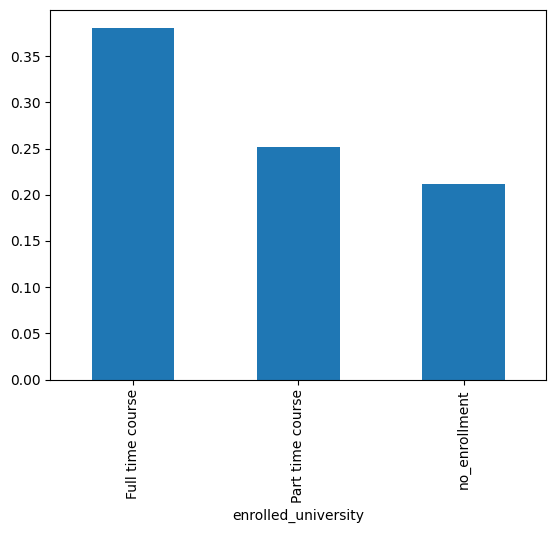

In [6]:
#  4단계: 직무 관련 GroupBy 분석
df.groupby('enrolled_university')['target'].mean().plot(kind='bar')

'''
인사이트 활용 팁
-교육 상태가 이직률에 영향을 미치는가?
-Full time course 등록자가 이직률이 높다면?
-새로운 기회를 찾기 위해 학습 중일 가능성이 있음
-no_enrollment 그룹은 안정적으로 일하고 있는 중일 수도 있음
-⚠️ 전체 비율이 100%가 되지 않는 이유는 NaN(결측치) 값을 제외하고 비율을 계산했기 때문입니다.
'''


In [7]:
#5단계: 연령대 파생변수 생성; 연령대 기준으로 새로 변수 만듦
df2['experience']=df2['experience'].replace({'<1':0, '>20':21}).astype(float)
#.replace(): value 변경시켜 주네!

df2['exp_group']=pd.cut(df2['experience'], bins=[-1,2,5,10,20,30], labels=['Entry','Junior','Mid','Senior','Veteran'])
#pd.cut(): 숫자형 데이터를 구간별로 나누어 범주형(label) 으로 변환하는 함수입니다.
#bins=[-1, 2, 5, 10, 20, 30]: -1~2(신입), 2~5(주니어) 등으로 범주형 label 그룹 만들었음
#labels=[...]: 각 구간에 붙일 이름(라벨)입니다. 구간과 순서가 정확히 일치해야 해요.
df2.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,exp_group
0,8949,city_103,0.920,1,Has relevent experience,no_enrollment,STEM,21.0,NaN,NaN,1,36,1.0,False,False,False,False,Veteran
1,29725,city_40,0.776,1,No relevent experience,no_enrollment,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0,False,False,False,False,Senior
2,11561,city_21,0.624,3,No relevent experience,Full time course,STEM,5.0,NaN,NaN,never,83,0.0,False,False,False,False,Junior
3,33241,city_115,0.789,3,No relevent experience,NaN,Business Degree,0.0,NaN,Pvt Ltd,never,52,1.0,False,False,False,False,Entry
4,666,city_162,0.767,1,Has relevent experience,no_enrollment,STEM,21.0,50-99,Funded Startup,4,8,0.0,False,True,False,False,Veteran


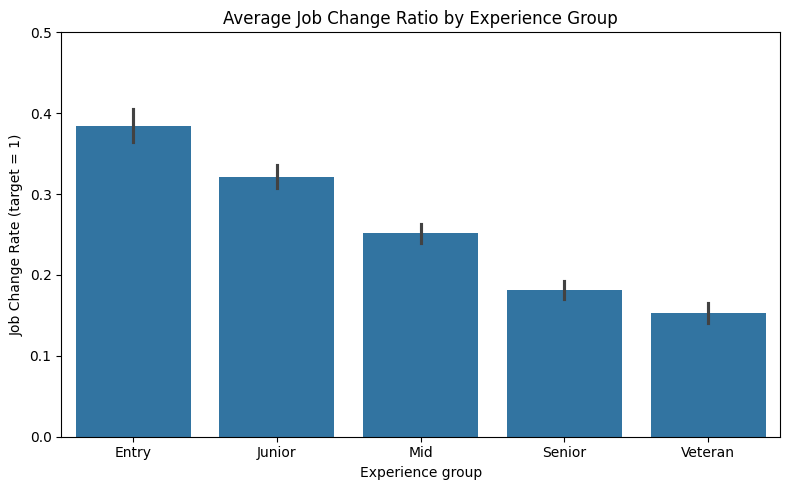

"연차도 그냥 숫자가 아니라 '경력 그룹'으로 나누면 패턴이 더 뚜렷해집니다."

In [8]:
import matplotlib.pyplot as plt

# 그래프 크기 설정 (가로 8, 세로 5 인치)
plt.figure(figsize=(8,5))

# 경험 그룹별 평균 이직률(target=1 비율)을 막대그래프로 시각화
sns.barplot(data=df2, x='exp_group', y='target',order=['Entry','Junior','Mid','Senior','Veteran'])

# 그래프 제목 설정
plt.title('Average Job Change Ratio by Experience Group')

# x축 라벨 설정
plt.xlabel('Experience group')

# y축 라벨 설정
plt.ylabel('Job Change Rate (target = 1)')

# y축 범위 0~0.5로 제한
plt.ylim(0,0.5)

# 레이아웃 자동 조정 (라벨 겹침 방지)
plt.tight_layout()

# 그래프 출력
plt.show()

"연차도 그냥 숫자가 아니라 '경력 그룹'으로 나누면 패턴이 더 뚜렷해집니다."


IQR: 65.0
이상치 기준값: -74.5 ~ 185.5
이상치 개수: 984개


<Axes: xlabel='training_hours'>

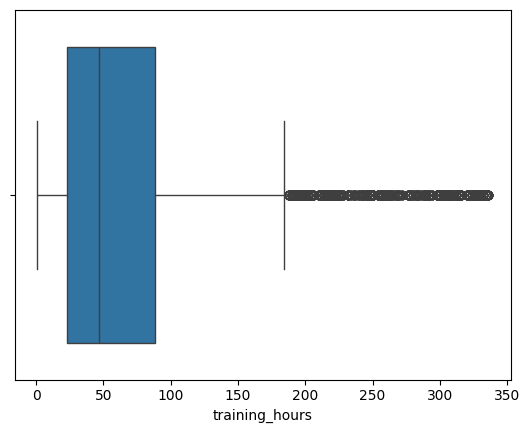

In [10]:
#6단계: 이상치 탐지 및 처리 
''' IQR(Interquartile Range, 사분위 범위)란?
IQR = Q3 - Q1

Q1 (1사분위수): 하위 25%에 해당하는 값 (25번째 백분위수) = 상자(Box) 시작점
Q3 (3사분위수): 상위 75%에 해당하는 값 (75번째 백분위수) = 상자(Box) 끝점
IQR: Q1과 Q3 사이의 범위로, 데이터의 중간 50%를 포함.

굵은 선 = 중앙값(Median)
수염(Whiskers): Q1 - 1.5IQR ~ Q3 + 1.5IQR 범위 내 값
이 범위를 벗어나는 값 = 이상치(Outlier)​
==> 값 < Q1 - 1.5 × IQR
==> 값 > Q3 + 1.5 × IQR
'''
# IQR 계산
Q1=df2["training_hours"].quantile(0.25)
Q3=df2["training_hours"].quantile(0.75)
IQR=Q3-Q1

# 이상치 기준 범위
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 확인
outliers = df2[(df2['training_hours'] < lower_bound) | (df2['training_hours'] > upper_bound)]

print(f"IQR: {IQR}")
print(f"이상치 기준값: {lower_bound:.1f} ~ {upper_bound:.1f}")
print(f"이상치 개수: {len(outliers)}개")

''' 왜 중요한가요?
IQR은 평균보다 안정적인 분포 기준이에요 (평균은 이상치에 민감함)
머신러닝 전처리에서 이상치 제거, 클리핑(자르기), 로그 변환 등을 하기 전에 IQR 기반 탐지를 먼저 수행하는 것이 일반적입니다.
'''
sns.boxplot(x=df2['training_hours'])



In [28]:
# 7단계: 전처리 함수화 
df3=copy.deepcopy(df) # 원본 raw data 건들지 않기 위해서


def preprocess(df):
    # 1. experience 컬럼: 특수 기호 '<1', '>20'을 숫자로 변환하고 float 형으로 변환'
    df['experience']=df['experience'].replace({'<1':1, '>20':21}).astype(float)

    # 2. 결측치 처리
    # 결측치가 많은 범주형 변수에 대해 전략적으로 'Unknown' 또는 기본값으로 채움
    df['gender'] = df['gender'].fillna('Unknown')
    df['enrolled_university'] = df['enrolled_university'].fillna('no_enrollment')
    df['education_level'] = df['education_level'].fillna('Unknown')
    df['major_discipline'] = df['major_discipline'].fillna('Unknown')
    df['company_type'] = df['company_type'].fillna('Unknown')
    df['company_size'] = df['company_size'].fillna('Unknown')

    # 3. 파생변수 생성: 경험치를 기준으로 경력 그룹(exp_group) 만들기
    df['exp_group']=pd.cut(
        df['experience'],
        bins=[-1,2,5,10,20,30],
        labels=['Entry', "Junior", "Mid", "Senior", "Veteran"]
    )
    # 4. 범주형 변수 인코딩: LabelEncoder를 사용하여 문자열을 숫자로 변환
    
    label_cols = ['gender', 'relevent_experience', 'enrolled_university',
                  'education_level', 'major_discipline', 'company_type', 'company_size', 'last_new_job']
    
    for col in label_cols:
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col].astype(str)) #문자열로 변환 후 엔코딩

 # 5. 이상치 제거: training_hours의 IQR을 기반으로 극단값 제거
    Q1=df['training_hours'].quantile(0.25)
    Q3=df['training_hours'].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q3 + 1.5 * IQR
    upper_bound=Q1 - 1.5 * IQR

    df=df[(df['training_hours'] >= lower_bound) | (df['training_hours'] <= upper_bound)]
    
    # 6. 불필요한 컬럼 제거: enrollee_id는 분석에 필요 없으므로 삭제
    if 'enrollee_id' in df.columns:
        df=df.drop(columns=["enrollee_id"])

    return df

"여러분이 만든 전처리 로직은 모델링에서도 재사용될 수 있도록 함수화해두는 것이 실무의 기본입니다."


preprocess(df3)


,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,exp_group
35,city_103,0.920,1,0,2,0,5,10.0,0,0,1,206,0.0,Mid
69,city_90,0.698,3,1,2,5,6,2.0,8,5,6,228,1.0,Entry
89,city_103,0.920,0,0,2,0,5,6.0,1,6,0,332,0.0,Mid
110,city_67,0.855,1,0,2,0,5,8.0,4,5,0,210,0.0,Mid
119,city_160,0.920,1,0,1,0,1,10.0,4,1,0,260,0.0,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19100,city_65,0.802,3,1,2,5,6,4.0,8,6,1,304,0.0,Junior
19107,city_160,0.920,1,1,1,0,5,3.0,8,6,0,322,1.0,Junior
19117,city_114,0.926,1,0,2,2,5,21.0,8,6,4,214,0.0,Veteran
19118,city_126,0.479,3,1,2,5,6,1.0,8,6,6,316,1.0,Entry


<Axes: xlabel='exp_group', ylabel='target'>

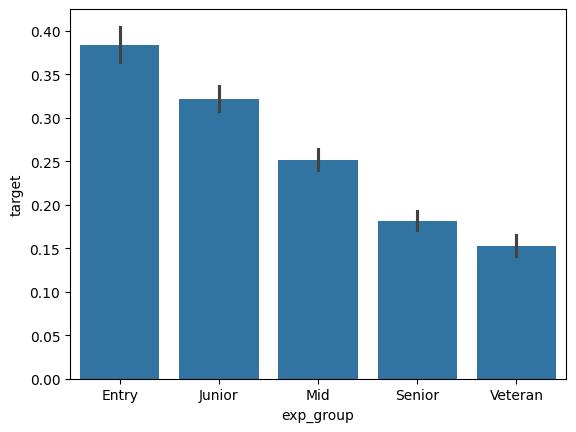

In [ ]:
# 8단계: 시각화 분석  
# "신입은 이직률이 낮고, 경력자일수록 높을까요? 이렇게 인사이트를 시각화로 전달하는 것도 중요한 실무 능력입니다."
sns.barplot(data=df2, x='exp_group', y='target')


In [29]:
from sklearn.model_selection import train_test_split
#9. 학습/테스트 데이터 분리를 위한 함수 불러오기

#1) 피처(입력값)와 target(정답값) 분리

x=df.drop(['target', 'enrollee_id'], axis=1)
# 'target'과 'enrollee_id' 컬럼 제거하고 나머지를 입력 데이터로 사용

y = df['target']
# 'target' 컬럼은 예측하고자 하는 값 (이직 여부)


# 2. 학습 데이터와 테스트 데이터 분리 (8:2 비율)
x_train, x_test, y_train, y_test= train_test_split(
    x, y,            # 입력 데이터 x와 정답 y
    test_size=0.2,   # 테스트 데이터 비율 20%
    random_state=42  # (선택) 재현 가능성을 위한 시드 설정
)

# 3. 학습용 입력 데이터를 CSV 파일로 저장
x_train.to_csv('X_train.csv', index=False)  
# 인덱스는 저장하지 않음






